# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [3]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = valid_ds.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [4]:
model = tf.keras.models.load_model('models/trained_model2.keras')

# Visualising and Performing Prediction on Single image

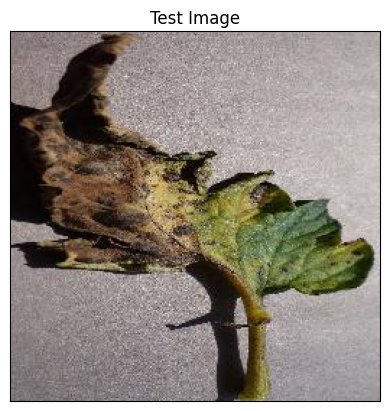

In [34]:
# Visualizing and Performing Prediction on a Single Image
image_path = 'New Plant Diseases Dataset(Augmented)/test/test/TomatoEarlyBlight1.JPG'

# Load and show the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [35]:
# Preprocess the image: resize, normalize, and batch it
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0  # ✅ Normalization step
input_arr = np.expand_dims(input_arr, axis=0)  # Convert to batch shape

In [36]:
print(predictions)

[[3.58641762e-12 7.05176846e-12 4.64510409e-11 1.10474524e-07
  1.49141637e-11 4.61437850e-07 4.54456114e-14 4.73018152e-12
  3.62405743e-13 5.17455783e-12 3.97019467e-13 2.46802557e-12
  4.60786314e-12 2.71442938e-12 1.04471293e-12 2.34027343e-13
  6.98049561e-12 7.66594514e-12 1.54009219e-11 8.00905609e-12
  2.45102383e-09 2.16566584e-10 5.51921064e-10 1.13320187e-11
  2.24848742e-12 8.75848905e-09 3.52716918e-11 1.84376841e-12
  2.18484764e-09 1.38054501e-08 8.61026876e-07 1.46765808e-08
  1.57607801e-07 7.49422355e-08 2.46848038e-04 1.49046866e-12
  5.32252298e-10 9.99751389e-01]]


In [37]:
predictions = model.predict(input_arr)
print("Raw Prediction Probabilities:\n", predictions)

1/1 [==============================] - 0s 29ms/step
Raw Prediction Probabilities:
 [[1.9386655e-04 3.4006923e-06 1.3933513e-04 1.4579778e-06 1.1455996e-06
  7.8891346e-05 2.2715983e-07 2.5382871e-04 1.4573906e-05 2.2180450e-04
  2.2278189e-07 1.9323563e-06 8.9751833e-05 1.7061298e-04 1.4288618e-08
  6.5973957e-08 7.3937941e-03 1.3835499e-06 4.1025114e-04 2.1517021e-06
  2.9291044e-04 9.8820368e-05 2.0462116e-06 3.2235394e-06 1.8862606e-07
  4.9358755e-06 1.2181566e-02 6.9224391e-09 5.4587767e-04 5.8846891e-01
  2.4572219e-01 5.0663454e-03 1.3849203e-01 1.0298020e-06 7.8060933e-05
  6.8440650e-06 3.1173269e-05 2.5215384e-05]]


In [38]:
result_index = np.argmax(predictions)
print("Predicted Class Index:", result_index)

Predicted Class Index: 29


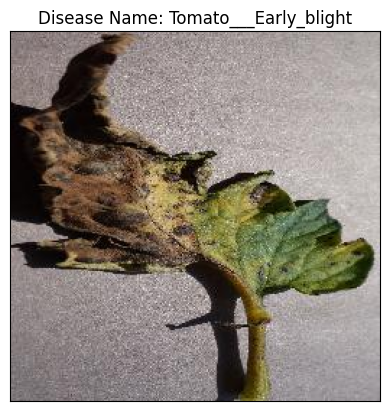

In [39]:
# Show the prediction result
model_prediction = class_name[result_index]

plt.imshow(img_rgb)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()